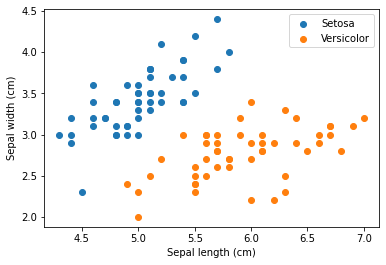

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

iris_data = iris.data

st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

class OutputLayer():
    def __init__(self, n, W, B):
        self.params = [n, W, B]

    def neuron(self, x, w, b):
        u = np.sum(x*w) + b
        return 1 / (1 + np.exp(-u))

    def delta(self, t):
        return (1-self.y)*self.y * (self.y-t)

    def __call__(self, x):  # 順伝搬
        n, W, B = self.params
        self.x = x

        self.y = np.zeros(n)
        for i in range(n):
            w = W[i]
            b = B[i]
            self.y[i] = self.neuron(x, w, b)
        return self.y   # この層の出力
    
    def backward(self, t, eta):
        n, W, B = self.params
        delta = self.delta(t)

        grad_x = np.zeros_like(self.x)
        for i in range(n):
            grad_x += delta[i] * W[i]
            W[i] -= eta * self.x * delta[i]
            B[i] -= eta * delta[i]

        return grad_x


In [4]:
import numpy as np
import matplotlib.pyplot as plt

class MiddleLayer():
    def __init__(self, n, W, B):
        self.params = [n, W, B]

    def neuron(self, x, w, b):
        u = np.sum(x*w) + b
        return 1 / (1 + np.exp(-u))

    def delta(self, grad_y):
        return (1-self.y)*self.y * grad_y

    def __call__(self, x):  # 順伝搬
        n, W, B = self.params
        self.x = x

        self.y = np.zeros(n)
        for i in range(n):
            w = W[i]
            b = B[i]
            self.y[i] = self.neuron(x, w, b)
        return self.y   # この層の出力
    
    def backward(self, grad_y, eta):
        n, W, B = self.params
        delta = self.delta(grad_y)

        grad_x = np.zeros_like(self.x)
        for i in range(n):
            grad_x += delta[i] * W[i]
            W[i] -= eta * self.x * delta[i]
            B[i] -= eta * delta[i]

        return grad_x

Epoch:  0


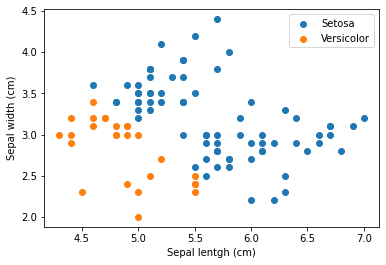

Epoch:  1


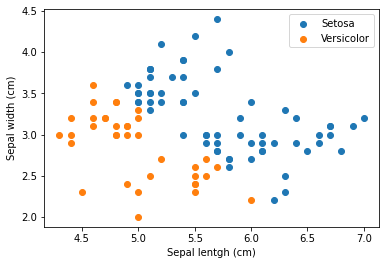

Epoch:  2


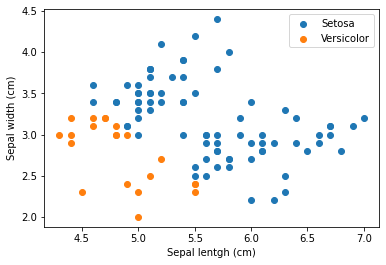

Epoch:  4


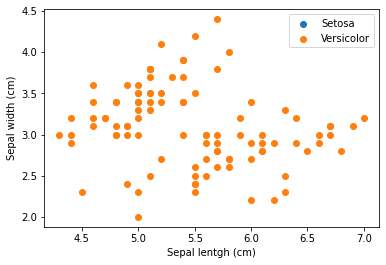

Epoch:  8


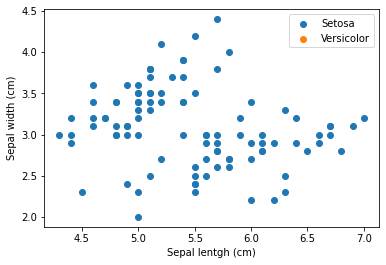

Epoch:  16


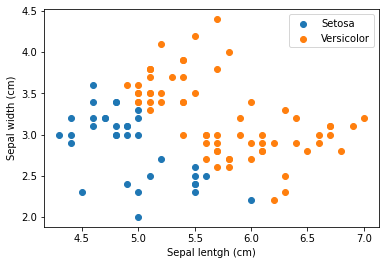

Epoch:  32


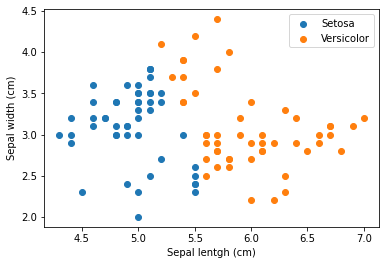

Epoch:  64


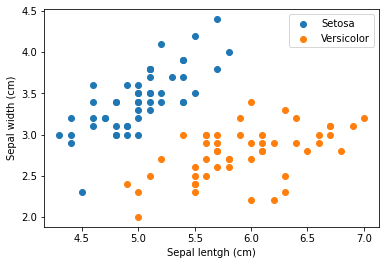

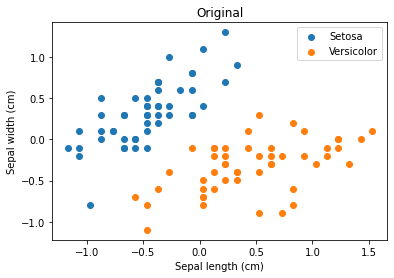

In [11]:
import random

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0]
sw_data = iris_data[:100, 1]

# 平均を０に
sl_ave = np.average(sl_data)
sl_data -= sl_ave
sw_ave = np.average(sw_data)
sw_data -= sw_ave

# 入力をリストに格納
train_data = []
for i in range(100):
    # 入力１、入力２、正解
    train_data.append([sl_data[i], sw_data[i], iris.target[i]])

# 各層の初期化
layers = [MiddleLayer(2, np.array([[4.0, 4.0], [4.0, 4.0]]), np.array([2.0, -2.0])),
            MiddleLayer(2, np.array([[4.0, 4.0], [4.0, 4.0]]), np.array([2.0, -2.0])),
            OutputLayer(1, np.array([[1.0, -1.0]]), np.array([-0.5]))]

# -- 順伝搬 --
def forward_propagation(x):
    for layer in layers:
        x = layer(x)
    return x

# -- 逆伝搬 --
def backpropagation(t, eta):
    grad_y = t  # 正解 t
    for layer in reversed(layers):
        grad_y = layer.backward(grad_y, eta)
    return grad_y

def show_graph(epoch):
    print("Epoch: ", epoch)

    st_predicted = [[], []]
    vc_predicted = [[], []]
    for data in train_data:
        x = np.array(data[:2])
        if forward_propagation(x) < 0.5:
            st_predicted[0].append(x[0]+sl_ave)
            st_predicted[1].append(x[1]+sw_ave)
        else:
            vc_predicted[0].append(x[0]+sl_ave)
            vc_predicted[1].append(x[1]+sw_ave)

    plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
    plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
    plt.legend()

    plt.xlabel("Sepal lentgh (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.show()

show_graph(0)

eta = 0.3
for t in range(0, 64):
    random.shuffle(train_data)
    for data in train_data:
        data = np.array(data)
        forward_propagation(data[:2])
        backpropagation(data[2], eta)
    if t+1 in [1, 2, 4, 8, 16, 32, 64]:
        show_graph(t+1)

st_data = iris_data[:50]
vc_data = iris_data[50:100]
plt.scatter(st_data[:, 0], st_data[:, 1], label="Setosa")
plt.scatter(vc_data[:, 0], vc_data[:, 1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Original")
plt.show()
